In [1]:
results_path = '../../Downloads/results_4_1/results/'

In [78]:
import numpy as np
import pickle
import os
import math
import matplotlib.pyplot as plt
import math
import numpy as np
%matplotlib inline

In [89]:
def get_results(pop_size,update_time,case,phrase):
    
    files = os.listdir('{}'.format(results_path))
    
    steps = []

    #check population and pop_size,update_time
    files = [f for f in files if '.DS' not in f and pop_size in f and phrase in f and 'update_days_{}'.format(update_time) in f and case in f and '2015' not in f]
    #files = files[:50]
    #print(len(files))
    #print(files)
    seen = 0 
    regrets = {}
    actions = {}
    for ff in files:
        #sim = int(ff.split('sim_')[1].strip('_continuous_pretreatment_base_coef_scale_hybrid.pkl'))
        #try:
        with open('{}{}'.format(results_path,ff),'rb') as f:
            d = pickle.load(f)
            #return d
            #print(d.keys())
            if len(d)>0:
            #if int(sim)<60:
                #print(len([k['steps'] for k in d['history'].values() if k['avail'] and k['decision_time']]))
                steps = steps+[k['steps'] for k in d['history'].values() if k['avail'] and k['decision_time']]
                for k,v in d['actions'].items():
                    if k not in actions:
                        actions[k]=v
                    actions[k].extend(v)
            seen = seen+1
           # print(ff)
    print(seen)
    return steps,regrets,actions

In [86]:
peek =  get_results('weighted_poolednewbigtest',7,'case_one','six_weeks_only_pplus')

In [87]:
peek.keys()

dict_keys(['gids', 'regrets', 'actions', 'history'])

In [72]:
b ,r,a= get_results('weighted_poolednewbigtest',7,'case_one','six_weeks_only_pplus')

5379
5388
5411
5364
5341
5379
5366
5415
5346
5337
5355
5363
5382
5414
5339
5325
5350
5360
5352
5329
5418
5348
5426
5400
5389
5351
5351
5332
5386
5347
5377
5387
5337
5335
5381
5366
5313
5341
5399
5415
5368
5421
5396
5376
5398
5390
5353
5305
5279
5391
5400
51


{Timestamp('2015-07-27 15:00:00'): [1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
 

In [63]:
np.array(b).mean()

5.1008317866481905

In [80]:
b,r,apersonalized = get_results('personalized',7,'case_one','six_weeks_only_pplus')

51


In [65]:
np.array(b).mean()

5.107622371164358

In [109]:
b,r,abatch = get_results('batch_baseline',7,'case_one','check')

51


In [110]:
np.array(b).mean()

5.13937531871266

In [68]:
def get_to_plot_actions(actions):
    
    skeys = sorted(actions.keys())
    to_plot = []
    for k in skeys:
        to_plot.append(sum(actions[k])/len(actions[k]))
    return to_plot

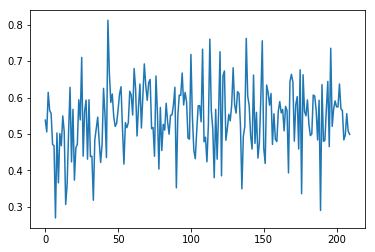

In [84]:
to_plot = get_to_plot_actions(a)
plt.plot(to_plot)

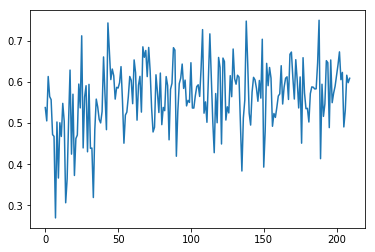

In [82]:
to_plot = get_to_plot_actions(apersonalized)
plt.plot(to_plot)

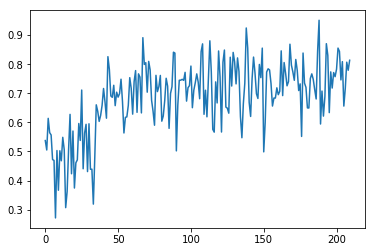

In [111]:
to_plot = get_to_plot_actions(abatch)
plt.plot(to_plot)